# Principal Component Analysis with Cancer Data

In [359]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [360]:
bc_df = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [361]:
bc_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [362]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [363]:
bc_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

The datatype of each column is as follows.

In [364]:
bc_df.shape

(699, 11)

The dataset contains 699 rows and 11 columns.

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [365]:
# We could see "?" values in column, this should be removed from data set
bc_df.info()
# Check for missing value in any other column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


The dataset contains 699 row entries. Also, no evident null values found in the dataset.
<br>Bare Nuclei shows type object, seems suspicious.

In [366]:
# No missing values found. So let us try to remove ? from bare nuclei column
bc_df[bc_df['Bare Nuclei'] == "?"].head()
# Get count of rows having ? 

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2


In [367]:
bc_df[bc_df['Bare Nuclei'] == "?"].shape

(16, 11)

Observed that 16 rows are having '?' value

In [368]:
df_barenuclei = bc_df[bc_df['Bare Nuclei'] != "?"]["Bare Nuclei"]

In [369]:
barenuclei_median =  df_barenuclei.astype(int).median()

In [370]:
print('Median of Bare Nuclei is observed to be {}'.format(barenuclei_median))
print("We can replace '?' with median");

Median of Bare Nuclei is observed to be 1.0
We can replace '?' with median


In [371]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [372]:
bc_df['Bare Nuclei'].replace(to_replace = "?", value=barenuclei_median, inplace = True) 

In [373]:
bc_df[bc_df['Bare Nuclei'] == "?"]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [374]:
bc_df["Bare Nuclei"] = bc_df["Bare Nuclei"].astype(int);
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB


Incorrect data has been handled.

In [375]:
bc_df.shape

(699, 11)

In [376]:
bc_df.drop_duplicates(inplace=True);

In [377]:
bc_df.shape

(690, 11)

9 Duplicates have been dropped.

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [378]:
# Check for correlation of variable

In [379]:
bc_df.drop(["ID"], axis = 1, inplace = True)

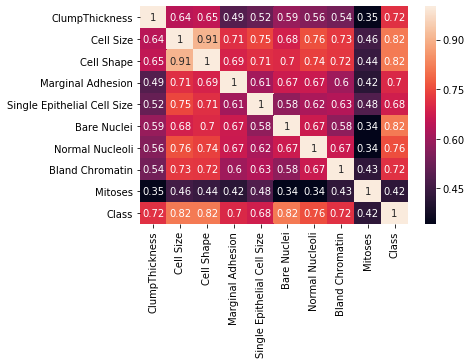

In [380]:
sns.heatmap(bc_df.corr(), annot=True)

In [381]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

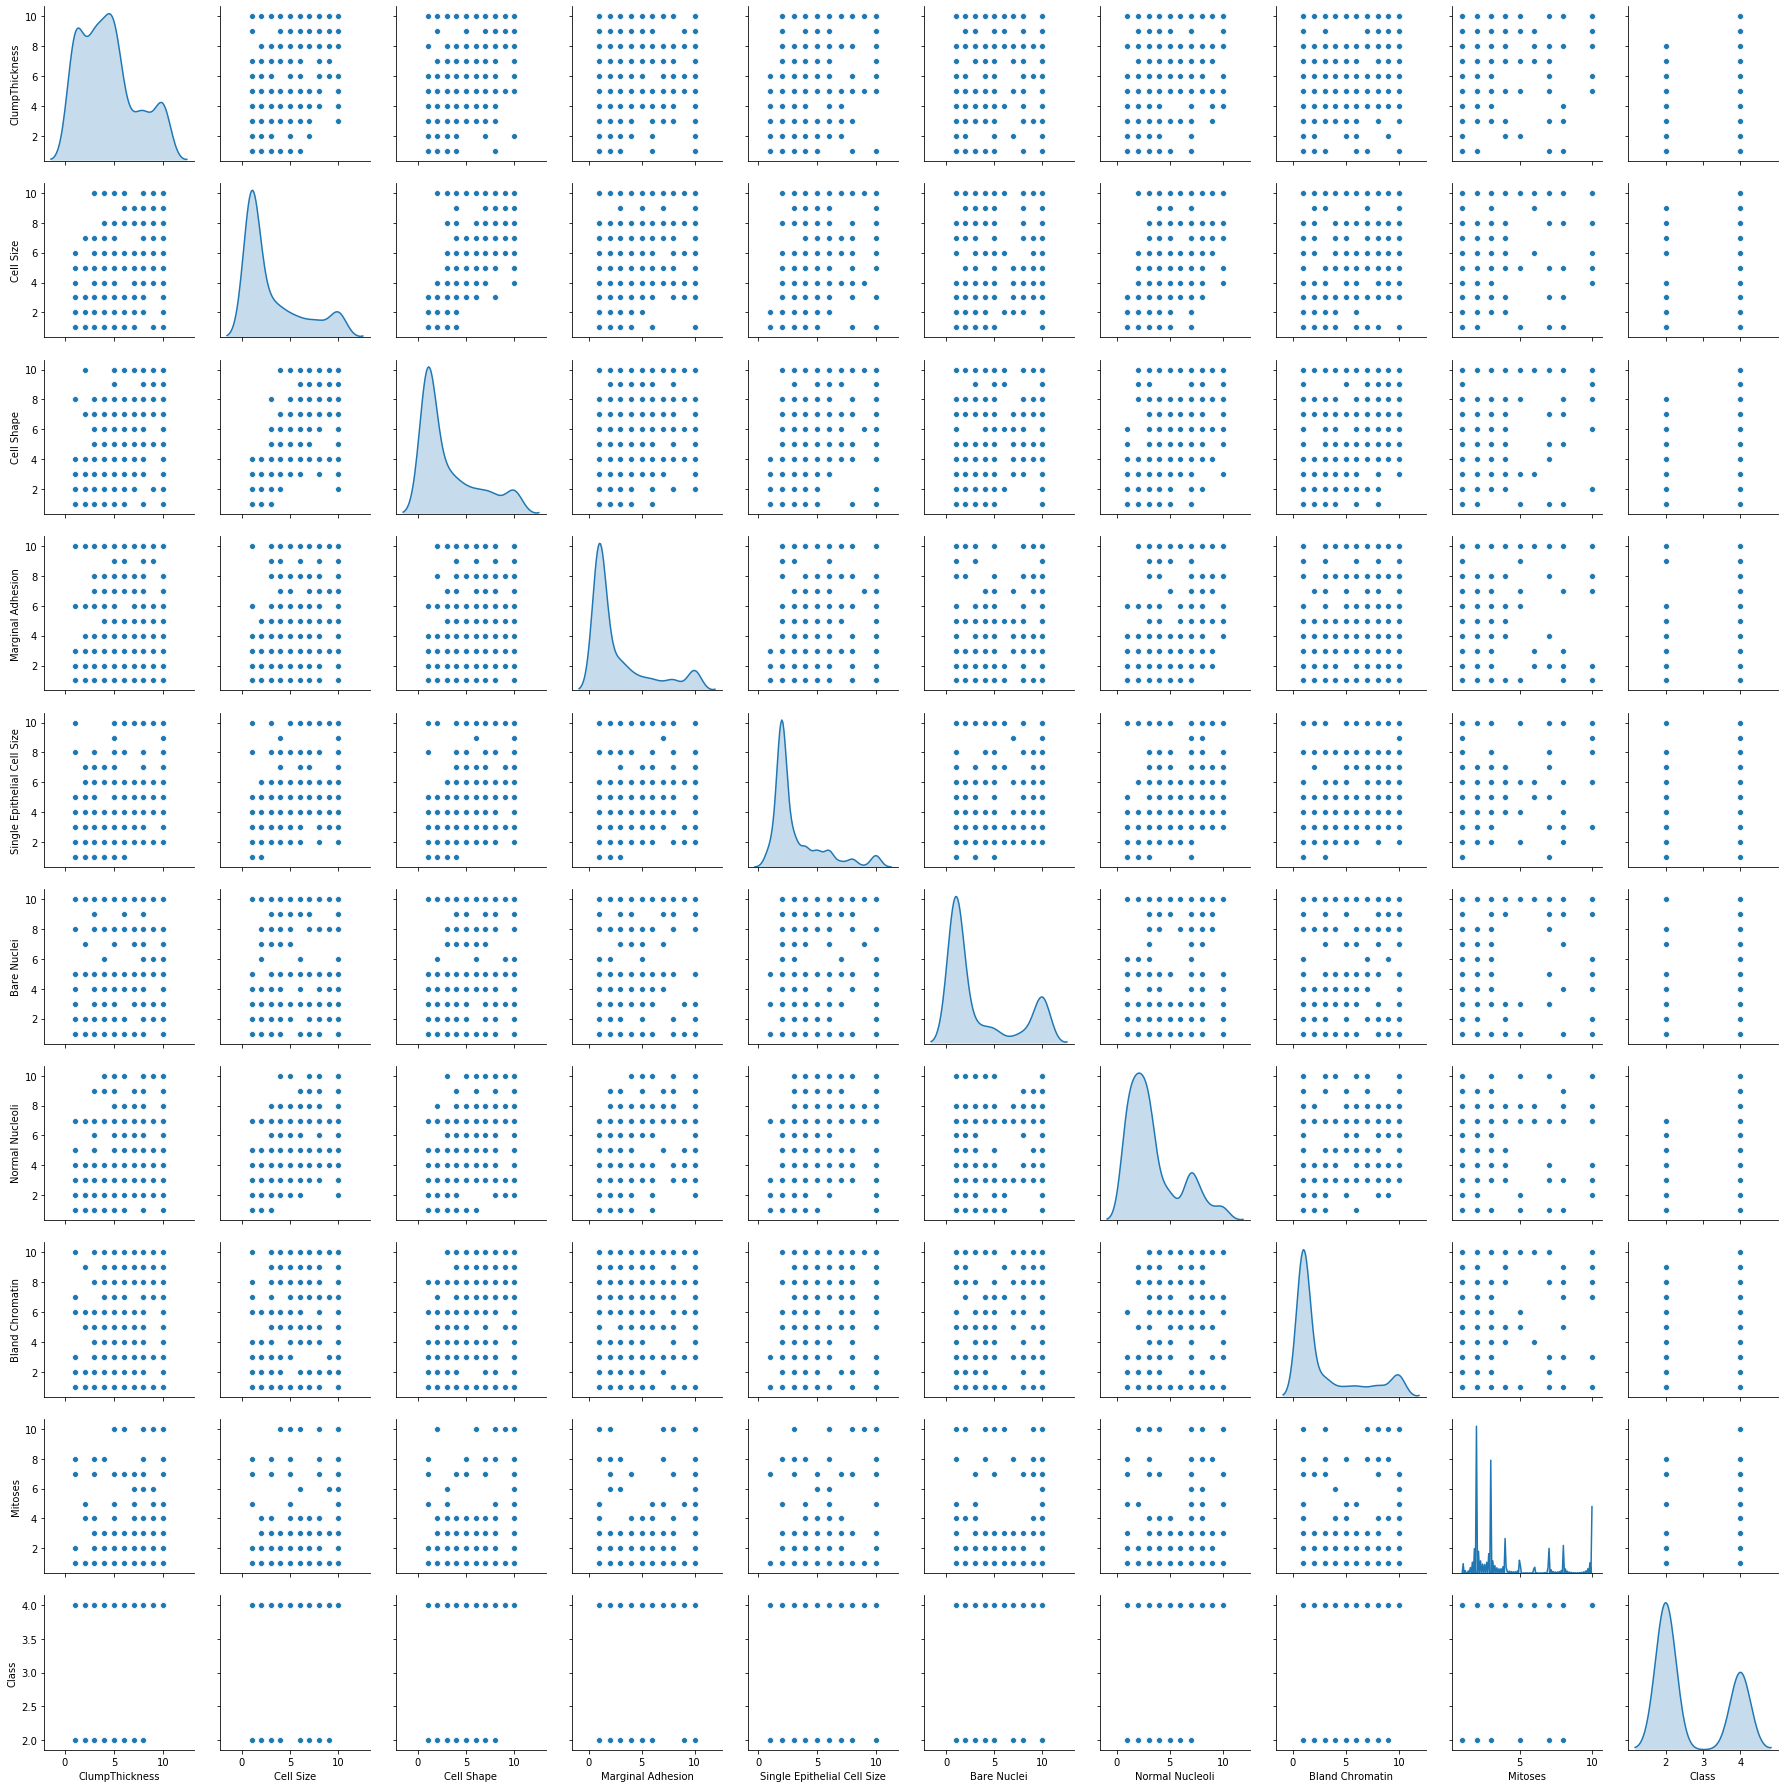

In [382]:
#Let us check for pair plots
sns.pairplot(bc_df,diag_kind='kde')

In [383]:
# Relationship between variables shows some correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [384]:
bc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,690.0,4.428986,2.817378,1.0,2.0,4.0,6.0,10.0
Cell Size,690.0,3.133333,3.042451,1.0,1.0,1.0,5.0,10.0
Cell Shape,690.0,3.204348,2.960844,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,690.0,2.827536,2.867787,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,690.0,3.213043,2.200964,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,690.0,3.482609,3.617064,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,690.0,3.436232,2.444060,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,690.0,2.885507,3.067682,1.0,1.0,1.0,4.0,10.0
Mitoses,690.0,1.594203,1.724230,1.0,1.0,1.0,1.0,10.0
Class,690.0,2.689855,0.951379,2.0,2.0,2.0,4.0,4.0


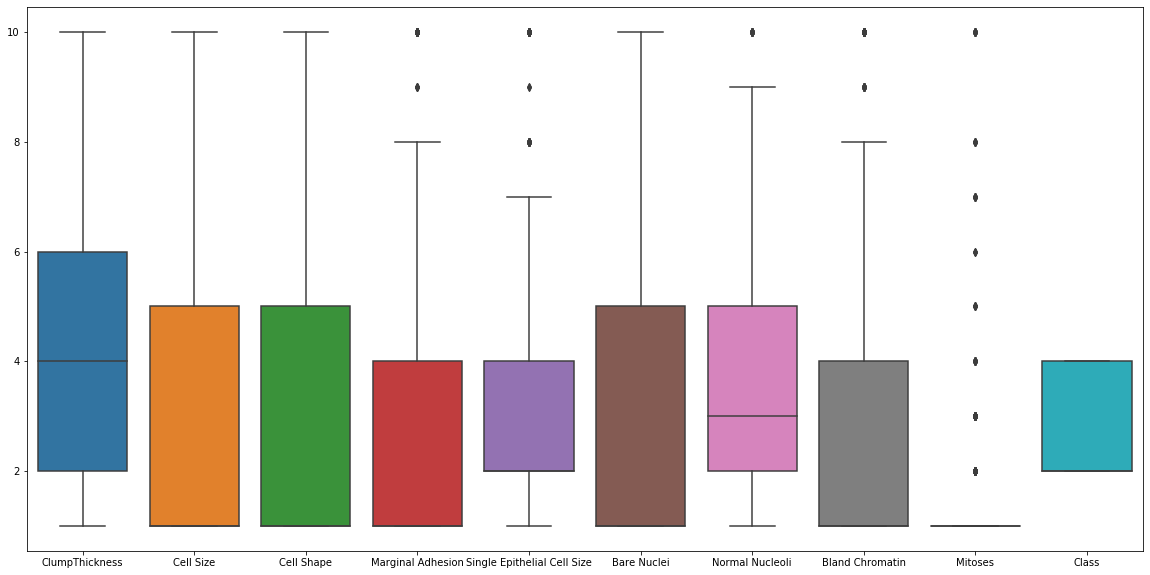

In [385]:
plt.figure(figsize=(20,10))
sns.boxplot(data=bc_df)

In [386]:
bc_df_FourthQuartile = bc_df.quantile([0.75])

In [387]:
bc_df_columns = bc_df.columns

In [388]:
bc_df_column_count = bc_df.shape[1]

In [389]:
for x in range(bc_df_column_count):
    bc_df[bc_df_columns[x]] = np.where(bc_df[bc_df_columns[x]] > bc_df_FourthQuartile[bc_df_columns[x]].values[0], bc_df_FourthQuartile[bc_df_columns[x]].values[0], bc_df[bc_df_columns[x]])    

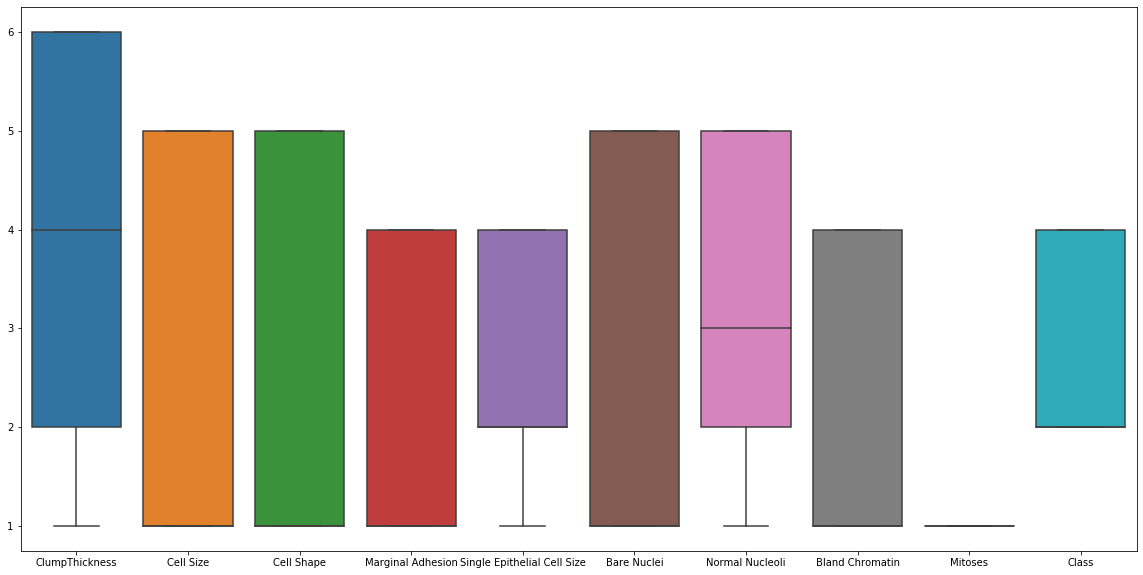

In [390]:
plt.figure(figsize=(20,10))
sns.boxplot(data=bc_df)

In [391]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [392]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn import datasets

In [393]:
bc_std = StandardScaler().fit_transform(bc_df)

In [394]:
cov_matrix = np.cov(bc_std.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[1.00145138 0.63039899 0.63229865 0.53009476 0.55213534 0.54214131
  0.52383653 0.54384475 0.         0.63431824]
 [0.63039899 1.00145138 0.91064821 0.76729703 0.80683597 0.78132175
  0.76194882 0.77837827 0.         0.88045997]
 [0.63229865 0.91064821 1.00145138 0.73170675 0.77509819 0.76435539
  0.72703062 0.75149011 0.         0.86199649]
 [0.53009476 0.76729703 0.73170675 1.00145138 0.6955125  0.70021386
  0.65110177 0.65326018 0.         0.74013583]
 [0.55213534 0.80683597 0.77509819 0.6955125  1.00145138 0.7026261
  0.67626384 0.72360753 0.         0.77200485]
 [0.54214131 0.78132175 0.76435539 0.70021386 0.7026261  1.00145138
  0.68791245 0.67852536 0.         0.83126123]
 [0.52383653 0.76194882 0.72703062 0.65110177 0.67626384 0.68791245
  1.00145138 0.68697604 0.         0.77191824]
 [0.54384475 0.77837827 0.75149011 0.65326018 0.72360753 0.67852536
  0.68697604 1.00145138 0.         0.76714292]
 [0.         0.         0.         0.         0.         0.
 

# Q7 Identify eigen values and eigen vector

In [395]:
# Step 2- Get eigen values and eigen vector

In [396]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [397]:
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[ 2.72936595e-01  9.45612512e-01  1.39766397e-02 -4.14102455e-02
  -1.45574559e-01 -3.06980100e-02  7.16315476e-02 -4.63297073e-02
  -7.72760597e-04  0.00000000e+00]
 [ 3.64381013e-01 -4.40363903e-02  8.06139978e-01 -1.03653412e-01
   4.18392075e-01  1.39673925e-01 -6.44295138e-02  7.69710426e-02
  -6.71891486e-03  0.00000000e+00]
 [ 3.56280321e-01  6.49975965e-03 -5.69718120e-01 -3.40047064e-01
   6.10110068e-01  1.59283905e-01 -1.71066379e-01  7.66884936e-02
  -7.80096054e-03  0.00000000e+00]
 [ 3.20929399e-01 -1.42479051e-01 -6.13683339e-02  2.34162916e-02
  -2.95411582e-02 -2.35615427e-01  5.58533495e-01  6.74327606e-02
  -7.06749952e-01  0.00000000e+00]
 [ 3.33262467e-01 -1.20896069e-01 -6.56609502e-02  2.15161372e-02
  -4.75837126e-01  6.28478391e-01 -2.45706297e-02  4.97107619e-01
   2.04989143e-02  0.00000000e+00]
 [ 3.32653103e-01 -1.52758833e-01  3.32864060e-02 -3.11810761e-01
  -4.02515329e-01 -2.10451737e-01 -5.94723472e-01 -3.80551926e-01
  -2.50695864e-01

# Q8 Find variance and cumulative variance by each eigen vector

In [398]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [399]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 74.7326713   80.83651744  84.90969709  88.71794927  92.13239416
  95.13148159  97.72695677  99.05719801 100.         100.        ]


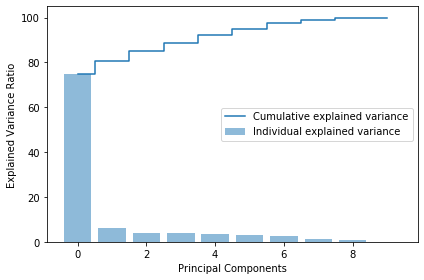

In [400]:
plt.figure(figsize=(6 , 4))
plt.bar(range(10), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(10), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

The first 6 principal components are explaining about 95% of the variance in the dataset.

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [401]:
from sklearn.decomposition import PCA

In [402]:
bc_arr = np.array(bc_df)
bc_centered = bc_arr - bc_arr.mean(axis=0)
bc_centered

array([[ 1.1942029 , -1.40724638, -1.5057971 , ..., -0.93913043,
         0.        , -0.68985507],
       [ 1.1942029 ,  1.59275362,  1.4942029 , ...,  0.06086957,
         0.        , -0.68985507],
       [-0.8057971 , -1.40724638, -1.5057971 , ..., -0.93913043,
         0.        , -0.68985507],
       ...,
       [ 1.1942029 ,  2.59275362,  2.4942029 , ...,  2.06086957,
         0.        ,  1.31014493],
       [ 0.1942029 ,  2.59275362,  2.4942029 , ...,  2.06086957,
         0.        ,  1.31014493],
       [ 0.1942029 ,  2.59275362,  2.4942029 , ...,  2.06086957,
         0.        ,  1.31014493]])

In [403]:
pca = PCA(n_components=6)
pca.fit(bc_centered)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [404]:
bc_pca = pca.transform(bc_centered)

In [405]:
bc_pca.shape

(690, 6)

In [406]:
pca.components_

array([[ 3.61498262e-01,  4.23990620e-01,  4.16849915e-01,
         2.75456146e-01,  2.09271462e-01,  4.05902946e-01,
         3.15787488e-01,  2.81735215e-01, -0.00000000e+00,
         2.28610597e-01],
       [-9.22416598e-01,  1.20797133e-01,  8.54616346e-02,
         1.16857943e-01,  7.05646933e-02,  2.60259602e-01,
         1.64942484e-01,  1.01036372e-01,  0.00000000e+00,
         5.88845844e-02],
       [ 1.00576598e-01, -2.44971989e-01, -2.44013745e-01,
         5.37587198e-04, -9.61538268e-02,  8.45668099e-01,
        -2.74637669e-01, -2.63765478e-01,  0.00000000e+00,
         3.05271488e-02],
       [ 7.92612383e-02, -2.59011254e-01, -3.94520890e-01,
        -1.75731472e-01, -8.29398875e-02,  7.83075984e-02,
         8.52110791e-01,  3.04452769e-02, -0.00000000e+00,
         8.46893916e-03],
       [ 2.14127523e-02, -7.74307599e-02, -2.47681796e-01,
         9.11607829e-01,  1.59333397e-02, -1.51190058e-01,
         7.32329138e-02, -2.62733060e-01,  0.00000000e+00,
        -6.

In [407]:
pca.explained_variance_

array([14.89121322,  1.82741288,  0.89061343,  0.73588383,  0.58911079,
        0.54619106])

In [408]:
pca.explained_variance_ratio_

array([0.73975314, 0.09078068, 0.04424314, 0.03655662, 0.02926535,
       0.02713322])

# Q10 Find correlation between components and features

In [409]:
bc_pca_df = pd.DataFrame(pca.components_)

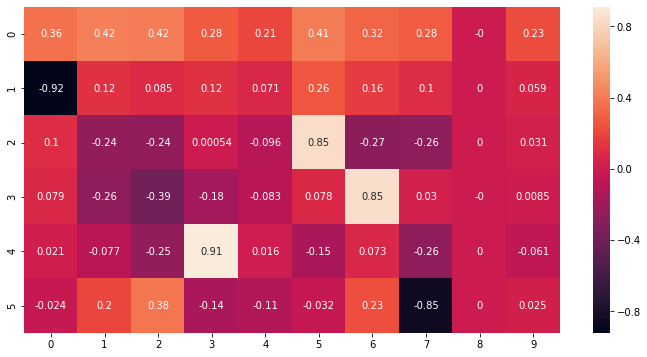

In [410]:
plt.figure(figsize=(12,6))
sns.heatmap(bc_pca_df, annot=True)

C:\Users\user1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


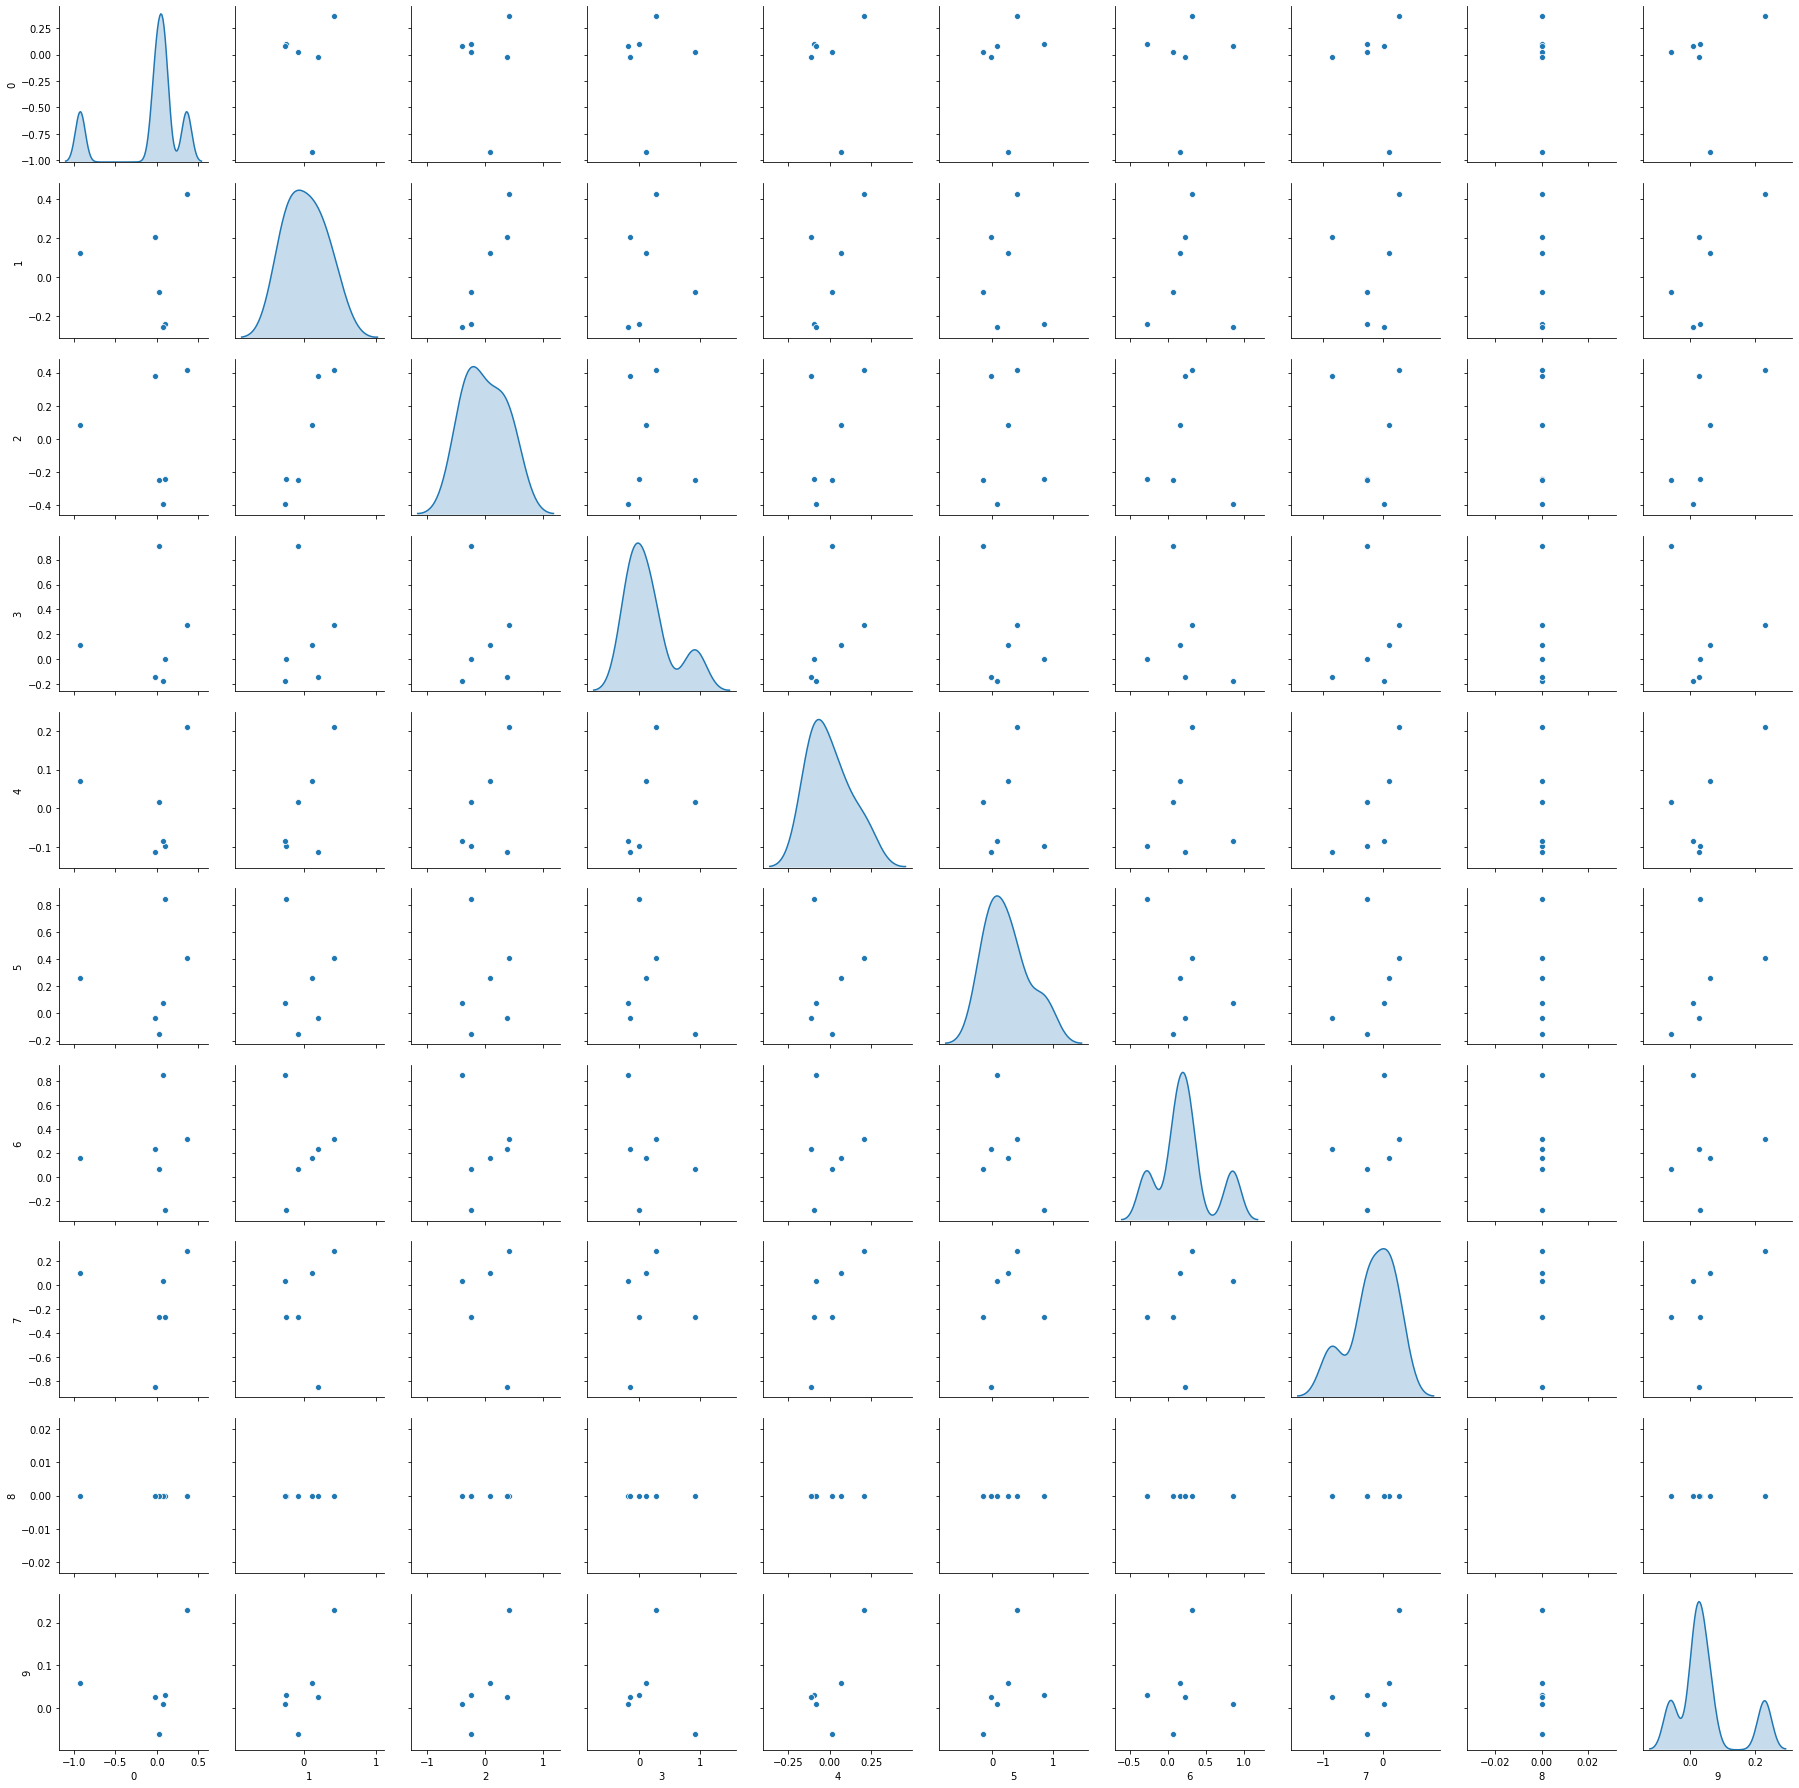

In [418]:
sns.pairplot(bc_pca_df, diag_kind='kde')

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [411]:
jokes_df = pd.read_csv("jokes.csv")
jokes_df.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [412]:
Joke_c = jokes_df.columns[1:101]
ratings = jokes_df[0:200][Joke_c]

In [413]:
ratings.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [414]:
ratings = ratings.replace(to_replace=99.00, value = 0)

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [415]:
jokes_mean = ratings.mean()

In [416]:
jokes_mean.sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64